In [1]:
import sys
sys.path.append('/home/hguo/e2eAD/endtoenddriving/') # change this to your end2enddriving folder path
from urban_driver_data import NuplanDataset
from torch.utils.data import Dataset, DataLoader
import torch
import config
from network.Hao_Guo.urban_driver import UrbanDriverModel
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

### 1. Test Dataset and Dataloader

In [2]:
torch.set_printoptions(precision=12)

In [3]:
# create dataset
train_dataset = NuplanDataset('train')
# overfit_dataset = NuplanDataset('overfit')

The train set has 1133 different scenes
The train set has 17832 samples


In [4]:
train_dataset[0]["images"].shape

torch.Size([3, 224, 224])

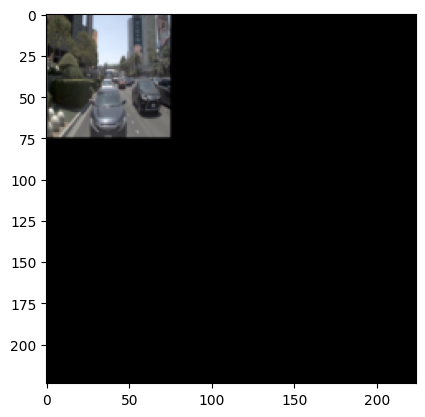

In [5]:
image_tensor = train_dataset[0]["images"]

# 转换为NumPy数组，并将通道置于最后一个维度
image_array = image_tensor.permute(1, 2, 0).numpy()

# 显示图像
plt.imshow(image_array)
plt.show()

In [6]:
def show_image(img_lst):
    num_images = img_lst.shape[0]
    num_rows = (num_images + 3) // 4  # 计算行数，每行最多显示4个图像
    fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # 创建合适大小的图像布局
    for i in range(num_images):
        row = i // 4  # 计算当前图像应该放在哪一行
        col = i % 4   # 计算当前图像应该放在哪一列
        img = transforms.ToPILImage()(img_lst[i])
        axs[row, col].imshow(img)
        axs[row, col].axis('off')
        axs[row, col].set_title(str(i + 1))  # 设置标题为数字
    plt.tight_layout()  # 自动调整子图之间的间距
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

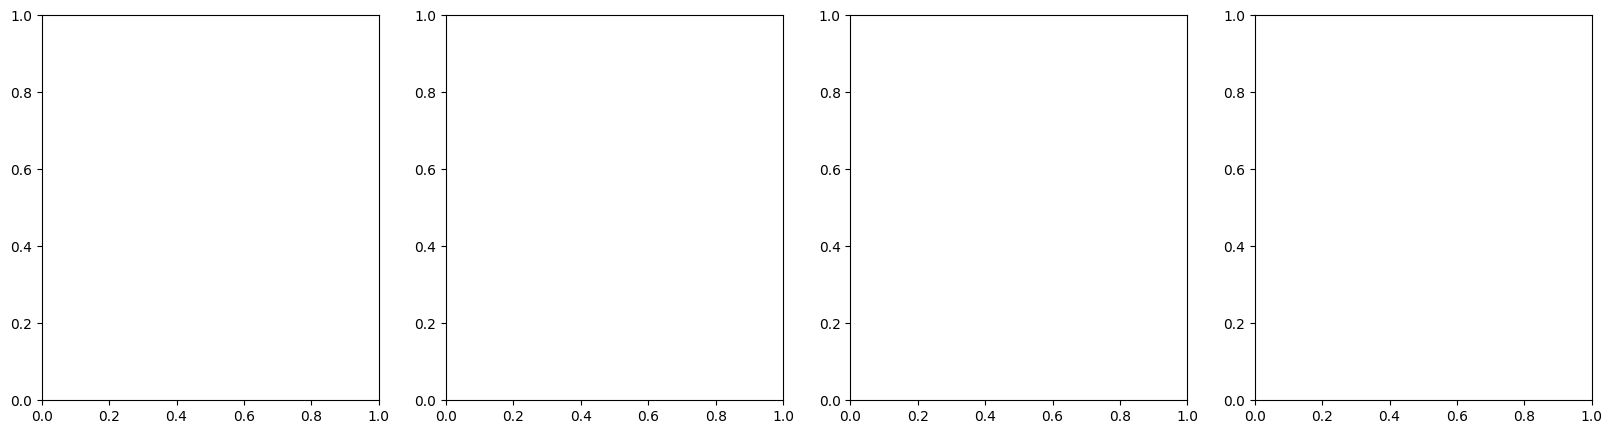

In [7]:
show_image(train_dataset[200]["images"])

In [39]:
train_dataset[0]["images"][0].shape

torch.Size([16, 3, 224, 224])
tensor([[[[0.603921592236, 0.596078455448, 0.619607865810,  ...,
           0.454901963472, 0.494117647409, 0.505882382393],
          [0.615686297417, 0.607843160629, 0.627451002598,  ...,
           0.443137258291, 0.478431373835, 0.501960813999],
          [0.623529434204, 0.611764729023, 0.627451002598,  ...,
           0.486274510622, 0.458823531866, 0.494117647409],
          ...,
          [0.368627458811, 0.333333343267, 0.301960796118,  ...,
           0.560784339905, 0.521568655968, 0.513725519180],
          [0.384313732386, 0.356862753630, 0.329411774874,  ...,
           0.556862771511, 0.521568655968, 0.505882382393],
          [0.400000005960, 0.372549027205, 0.349019616842,  ...,
           0.533333361149, 0.521568655968, 0.505882382393]],

         [[0.717647075653, 0.721568644047, 0.713725507259,  ...,
           0.470588237047, 0.525490224361, 0.537254929543],
          [0.713725507259, 0.725490212440, 0.721568644047,  ...,
           0.

torch.Size([3, 224, 224])

In [12]:
train_dataset[0]["ego_states"]

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [6]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=4)
print("the length of train dataloader is: ", len(train_dataloader))

the length of train dataloader is:  18615


In [7]:
# Test the dataloader
dataiter = iter(train_dataloader)
data = next(dataiter)
data["ego_states"].shape

torch.Size([1, 16, 2])

### 2. Test model

In [6]:
# Test the model(shape etc.)
model = UrbanDriverModel()
print(model)
output_tensor = model(data[0])
print("The output tensor shape is: ", output_tensor.shape)
print("The output tensor is: ", output_tensor)

UrbanDriverModel(
  (fc1): Linear(in_features=32, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
)
The output tensor shape is:  torch.Size([2, 8, 2])
The output tensor is:  tensor([[[-0.4783284068, -1.7935084105],
         [ 2.2248492241,  2.1927461624],
         [-2.4951057434, -2.3943033218],
         [-1.1600416899,  1.0005817413],
         [-3.4298157692,  0.4779826701],
         [ 0.0351195335, -0.6959202290],
         [ 2.1142332554,  0.8504591584],
         [-2.1894798279, -2.1751108170]],

        [[-0.5093140602, -1.7382962704],
         [ 2.1605796814,  1.9615436792],
         [-2.3395934105, -2.2030801773],
         [-0.9684715271,  1.0193547010],
         [-3.2008719444,  0.5134164095],
         [-0.0628165901, -0.6777372956],
         [ 1.9245280027,  0.8079128861],
         [-2.1615076065, -2.1631925106]]], grad_fn=<ViewBackward0>)


# 3. Overfitting